# PROJECT NOTEBOOK PART 3
#### THIS NOTEBOOK IS DEDICATED TO MODEL BUILDING
##### 1) Preparation of The Data. (Importing, spliting Labels, Features, Training set, Test set)
##### 2) Application of StandartScaling and PCA.
##### 3) Fiting Machine Learning models to data and validation of the results.
##### 4) Building Pipelines of the models
##### 5) Comparing individual model results to an Ensemble Model (VotingClassifier)
##### 6) Deciding on a Final Model

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle #To retrieve the training dataframe & store the model for the next notebook.
#df = pickle.load(open(r"datasets/gtzan_df","rb")) # read binary
df = pickle.load(open(r"datasets/turkish_songs_df","rb")) # read binary

#df = df[(df.genre_label == "Turkish Rock") |(df.genre_label == "Turkish Slow")]#|(df.genre_label == "Turkish Pop") |(df.genre_label == "Turkish Rap") ]
#df= df[df.genre_label !="Turkish Slow"]
#df= df[df.genre_label !="country"]

print(df.genre_label.value_counts())

df.describe()

Turkish Pop                99
Turkish Rock               95
Turkish Slow               80
Turkish Classical Music    62
Turkish Folk Music         61
Turkish Rap                51
Name: genre_label, dtype: int64


,rms_mean,rms_var,zcr_mean,zcr_var,spectral_centroid_mean,spectral_centroid_var,spectral_rolloff_mean,spectral_rolloff_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc10_var,mfcc11_var,mfcc12_var,mfcc13_var,mfcc14_var,mfcc15_var,mfcc16_var,mfcc17_var,mfcc18_var,mfcc19_var
count,448.000000,448.000000,448.000000,448.000000,448.000000,4.480000e+02,448.000000,4.480000e+02,448.000000,448.000000,...,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000
mean,0.200527,0.004965,0.101898,0.003795,2352.286990,6.160827e+05,4971.561187,2.314273e+06,2454.278074,165453.758917,...,74.548828,65.439468,63.049080,61.316441,59.575096,59.379498,61.469246,63.735378,65.087341,67.691147
std,0.089865,0.004405,0.032847,0.003499,551.139518,4.351670e+05,1282.206759,1.501476e+06,385.569915,131385.492484,...,37.039936,38.325527,32.698883,29.934406,31.121403,34.655369,35.586987,36.958328,37.600815,39.050797
min,0.023502,0.000080,0.033844,0.000196,983.150403,2.767899e+04,1761.351066,1.282243e+05,1105.615193,11746.442838,...,18.313444,16.874033,18.984680,21.012121,16.945910,16.627995,17.736090,14.625222,14.295912,15.568065
25%,0.127944,0.001605,0.075548,0.001436,1943.414859,3.033918e+05,3955.433333,1.152449e+06,2211.177451,81302.147195,...,49.064361,45.100856,42.166474,40.886678,39.795320,40.252122,40.274116,38.864389,42.277700,41.979182
50%,0.195964,0.003499,0.100866,0.002850,2370.144792,5.373876e+05,5068.508833,1.983180e+06,2503.114342,125606.009706,...,67.199852,56.695318,55.414564,55.837130,52.558872,50.936712,51.764841,54.764435,55.633356,56.643951
75%,0.270749,0.007113,0.124357,0.005095,2727.169460,7.906477e+05,5885.134328,3.159965e+06,2735.735806,202241.095585,...,87.972834,75.170979,72.930826,73.797796,69.200150,67.363373,73.314472,76.774889,77.021532,81.395462
max,0.461057,0.023074,0.225042,0.027619,3721.121832,2.517378e+06,7711.509673,8.125476e+06,3164.664804,887201.639914,...,313.978546,564.244446,259.150024,262.038757,247.575302,425.311798,284.634918,244.934769,274.133545,285.669495


<AxesSubplot:>

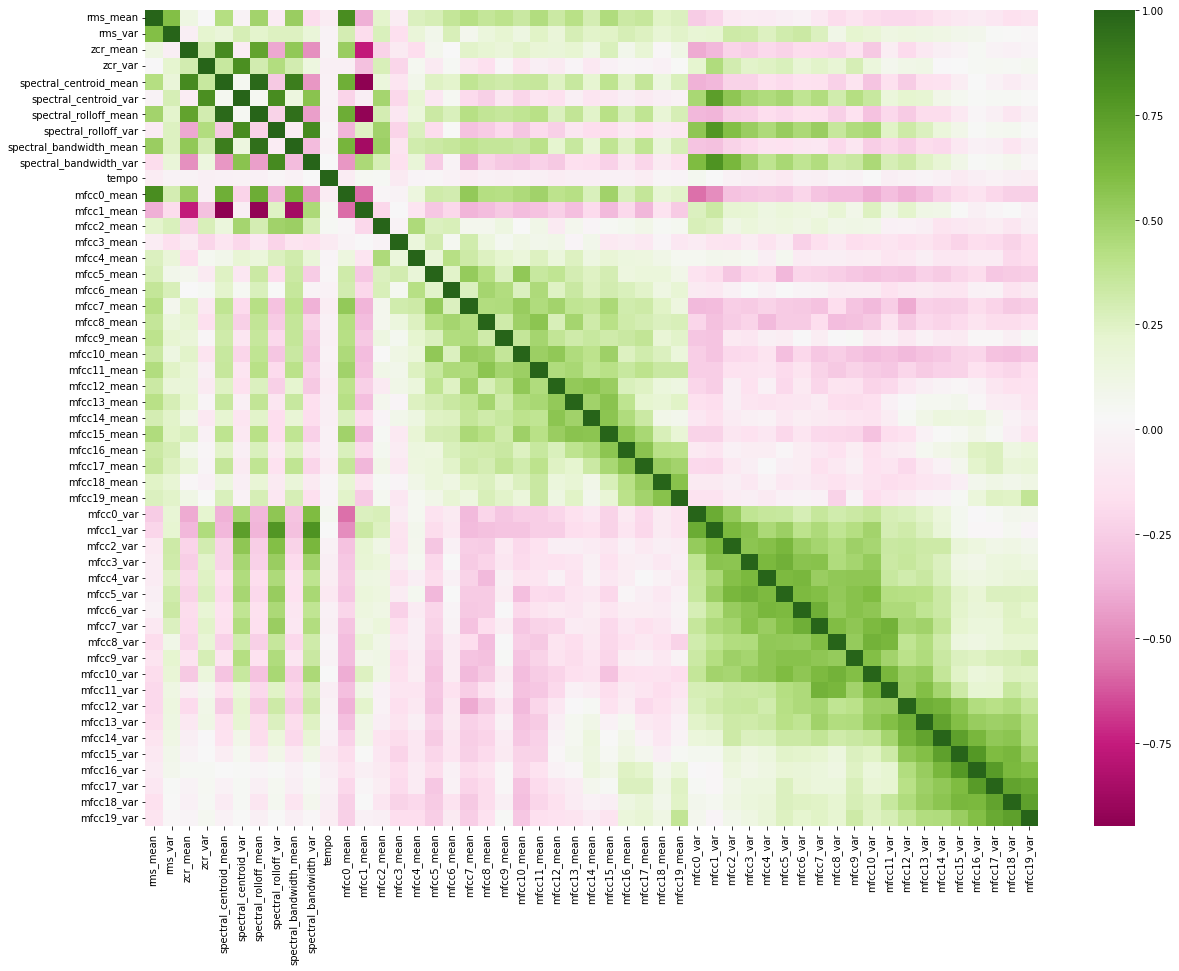

In [3]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,15)) 
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, ax = ax,cmap="PiYG")
#plt.savefig("correlation.png")

In [4]:
from sklearn.model_selection import train_test_split

features = df.drop(['file_name', 'genre_label'], axis=1).values
labels = df.genre_label.values
file_names = df.file_name.values

X_train, X_test, y_train, y_test = train_test_split(features, labels,test_size=0.1,stratify=labels)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)


In [6]:
print(f"Spectral centroids         :{list(X_train[:,4][:5])}\nSpectral centroid z-scores :{list(scaled_X_train[:,4][:5])}")

Spectral centroids         :[2344.9586252628787, 2452.2496643493987, 2293.8176972024594, 2069.4036759764103, 3001.0405786307206]
Spectral centroid z-scores :[-0.003183424262926769, 0.18960941877130608, -0.09507930858022372, -0.4983321574413971, 1.1757398682148246]


Text(0.5, 0, 'Principal Component #')

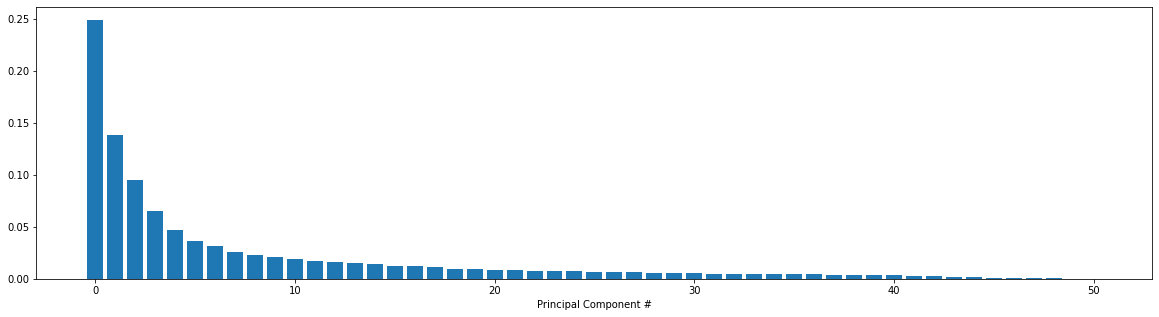

In [7]:
from sklearn.decomposition import PCA
# Get our explained variance ratios from PCA using all features
pca = PCA()
pca.fit(scaled_X_train)
exp_variance = pca.explained_variance_ratio_

# plot the explained variance using a barplot
fig, ax = plt.subplots(figsize = (20,5))
ax.bar(range(pca.n_components_), exp_variance)
ax.set_xlabel('Principal Component #')

Recommended Principle components : 19


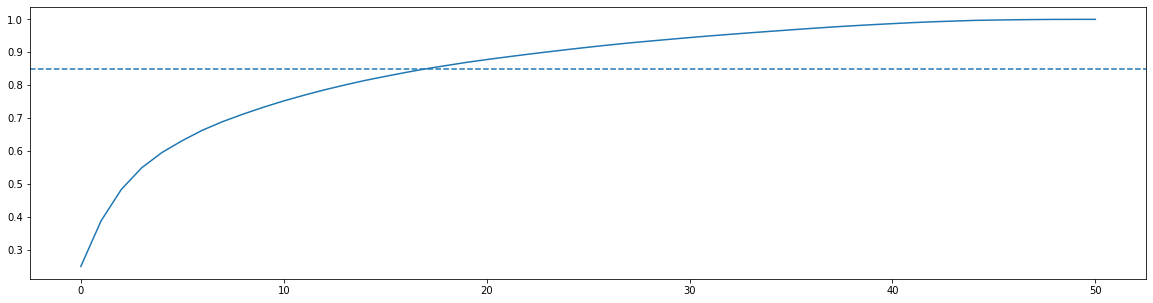

In [8]:
# Calculate the cumulative explained variance
cum_exp_variance = np.cumsum(exp_variance)

# Plot the cumulative explained variance and draw a dashed line at 0.85.
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(cum_exp_variance)
ax.axhline(y=0.85, linestyle='--')


recommended_pc_count = np.sum(cum_exp_variance < 0.86)

print(f"Recommended Principle components : {recommended_pc_count}")

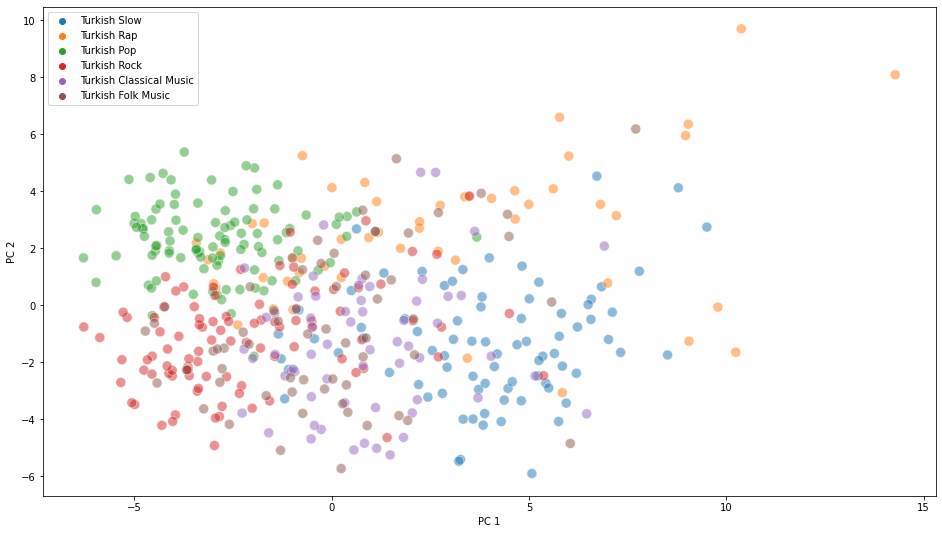

In [9]:
pca = PCA(n_components = 2)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
train_pca = pca.fit_transform(scaled_features)


pca_df = pd.DataFrame(data = train_pca, columns = ['PC 1', 'PC 2'])

plt.figure(figsize = (16, 9))


sns.scatterplot(x = "PC 1", y = "PC 2", data = pca_df, hue = labels, alpha = 0.5, s = 100);
plt.savefig("pca2_turkish.png")

In [10]:
pca = PCA(n_components = recommended_pc_count)

# Fit and transform the scaled training features using pca
train_pca = pca.fit_transform(scaled_X_train)

# Fit and transform the scaled test features using pca
test_pca = pca.transform(scaled_X_test)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC



logreg = LogisticRegression(solver ="liblinear")
gnb = GaussianNB()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors=2)
svc = SVC(gamma = 'auto',probability=True)

logreg.fit(train_pca, y_train)
gnb.fit(train_pca, y_train)
dt.fit(train_pca, y_train)
knn.fit(train_pca, y_train)
svc.fit(train_pca, y_train)

        
pred_labels_logreg = logreg.predict(test_pca)
pred_labels_gnb = gnb.predict(test_pca)
pred_labels_dt = dt.predict(test_pca)
pred_labels_knn = knn.predict(test_pca)
pred_labels_svc = svc.predict(test_pca)

### Classification Report

In [12]:
# Create the classification report for both models
from sklearn.metrics import classification_report

class_rep_logreg = classification_report(y_test,pred_labels_logreg, zero_division = 1)
print(f"Logistic Regression: \n{class_rep_logreg}\n")

class_rep_gnb = classification_report(y_test,pred_labels_gnb, zero_division = 1)
print(f"GaussianNB: \n{class_rep_gnb}\n")

class_rep_dt = classification_report(y_test,pred_labels_dt, zero_division = 1)
print(f"Decision Tree: \n{class_rep_dt}\n")

class_rep_knn = classification_report(y_test,pred_labels_knn, zero_division = 1)
print(f"K-Neigbors: \n{class_rep_knn}\n")

class_rep_svc = classification_report(y_test,pred_labels_svc, zero_division = 1)
print(f"SVC: \n{class_rep_svc}\n")

Logistic Regression: 
                         precision    recall  f1-score   support

Turkish Classical Music       0.50      0.67      0.57         6
     Turkish Folk Music       0.67      0.33      0.44         6
            Turkish Pop       0.80      0.80      0.80        10
            Turkish Rap       0.67      0.80      0.73         5
           Turkish Rock       0.60      0.60      0.60        10
           Turkish Slow       0.88      0.88      0.88         8

               accuracy                           0.69        45
              macro avg       0.68      0.68      0.67        45
           weighted avg       0.70      0.69      0.68        45


GaussianNB: 
                         precision    recall  f1-score   support

Turkish Classical Music       0.50      0.50      0.50         6
     Turkish Folk Music       0.00      0.00      0.00         6
            Turkish Pop       0.75      0.90      0.82        10
            Turkish Rap       1.00      0.60      

In [96]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline

logreg_pipe = Pipeline([("scaler", StandardScaler()), 
                        ("logreg", LogisticRegression(solver='lbfgs', max_iter=1000))])

gnb_pipe = Pipeline([("scaler", StandardScaler()), 
                        ("gnb", GaussianNB())])

dt_pipe = Pipeline([("scaler", StandardScaler()), 
                        ("dt", DecisionTreeClassifier())])

knn_pipe = Pipeline([("scaler", StandardScaler()), 
                        ("knn", KNeighborsClassifier())])

svc_pipe = Pipeline([("scaler", StandardScaler()), 
                        ("svc", SVC(probability = True))])

# Set up our K-fold cross-validation
kf = StratifiedKFold(10)

logreg_score = cross_val_score(logreg_pipe, features, labels, cv=kf)
gnb_score = cross_val_score(gnb_pipe, features, labels, cv=kf)
dt_score = cross_val_score(dt_pipe, features, labels, cv=kf)
knn_score = cross_val_score(knn_pipe, features, labels, cv=kf)
svc_score = cross_val_score(svc_pipe, features, labels, cv=kf)


# Print the mean of score arrays
print(f"Logistic Regression: {np.mean(logreg_score):.3f}")
print(f"GaussianNB: {np.mean(gnb_score):.3f}")
print(f"Decision Tree: {np.mean(dt_score):.3f}")
print(f"k-Neighbors: {np.mean(knn_score):.3f}")
print(f"SVC: {np.mean(svc_score):.3f}")


#logreg_pipe.fit(features,labels)
#coefs = logreg_pipe.named_steps["logreg"].coef_

Logistic Regression: 0.921
GaussianNB: 0.898
Decision Tree: 0.806
k-Neighbors: 0.926
SVC: 0.932


In [97]:
logreg_pipe = Pipeline([("scaler", StandardScaler()), ("pca", PCA(n_components=recommended_pc_count)), 
                        ("logreg", LogisticRegression(solver='lbfgs', max_iter=1000))])

gnb_pipe = Pipeline([("scaler", StandardScaler()), ("pca", PCA(n_components=recommended_pc_count)), 
                        ("gnb", GaussianNB())])

dt_pipe = Pipeline([("scaler", StandardScaler()), ("pca", PCA(n_components=recommended_pc_count)), 
                        ("dt", DecisionTreeClassifier())])

knn_pipe = Pipeline([("scaler", StandardScaler()), ("pca", PCA(n_components=recommended_pc_count)), 
                        ("knn", KNeighborsClassifier())])

svc_pipe = Pipeline([("scaler", StandardScaler()), ("pca", PCA(n_components=recommended_pc_count)), 
                        ("svc", SVC())])


# Set up our K-fold cross-validation
kf = StratifiedKFold(10)

logreg_score = cross_val_score(logreg_pipe, features, labels, cv=kf)
gnb_score = cross_val_score(gnb_pipe, features, labels, cv=kf)
dt_score = cross_val_score(dt_pipe, features, labels, cv=kf)
knn_score = cross_val_score(knn_pipe, features, labels, cv=kf)
svc_score = cross_val_score(svc_pipe, features, labels, cv=kf)


# Print the mean of score arrays
print(f"Logistic Regression: {np.mean(logreg_score):.3f}")
print(f"GaussianNB: {np.mean(gnb_score):.3f}")
print(f"Decision Tree: {np.mean(dt_score):.3f}")
print(f"k-Neighbors: {np.mean(knn_score):.3f}")
print(f"SVC: {np.mean(svc_score):.3f}")


Logistic Regression: 0.939
GaussianNB: 0.852
Decision Tree: 0.858
k-Neighbors: 0.926
SVC: 0.938


### PARAMETER TUNING

In [98]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV

In [39]:
params_gnb = {'gnb__priors': [None],
             'gnb__var_smoothing': np.logspace(0,-9, num=10),"pca__n_components":[10,15,19,21,25,27,33]}
gs_gnb = GridSearchCV(gnb_pipe, 
                 param_grid=params_gnb,
                 cv=kf,
                 verbose=1, 
                 scoring='f1_micro')
gs_gnb.fit(features, labels)
print(gs_gnb.best_params_)
print(f"GaussianNB: {np.mean(gnb_score):.3f}")
print(f'Best GNB score : {gs_gnb.best_score_:.3f}')
############################################################
params_dt = {'dt__criterion':['gini','entropy'],'dt__max_depth':[11,15,20,30,90,120,150],
             "pca__n_components":[7,9,11,13,15,17,19,21,23]}
gs_dt = GridSearchCV(dt_pipe, 
                 param_grid=params_dt,
                 cv=kf,
                 verbose=1, 
                 scoring='f1_micro')
gs_dt.fit(features, labels)
print(gs_dt.best_params_)
print(f"Decision Tree: {np.mean(dt_score):.3f}")
print(f'Best dt score : {gs_dt.best_score_:.3f}')
###########################################################


Fitting 10 folds for each of 70 candidates, totalling 700 fits
{'gnb__priors': None, 'gnb__var_smoothing': 0.001, 'pca__n_components': 33}
GaussianNB: 0.663
Best GNB score : 0.676
Fitting 10 folds for each of 126 candidates, totalling 1260 fits
{'dt__criterion': 'entropy', 'dt__max_depth': 15, 'pca__n_components': 15}
Decision Tree: 0.551
Best dt score : 0.614


In [99]:
logreg_pipe = Pipeline([("scaler", StandardScaler()), 
                        ("logreg", LogisticRegression(solver='lbfgs', max_iter=1000))])

params_logreg={"logreg__C":np.logspace(-3,3,7), "logreg__penalty":["l1","l2"],"logreg__solver":['liblinear','lbfgs'],"logreg__max_iter" : [1000]} 

gs_logreg = GridSearchCV(logreg_pipe, 
                 param_grid=params_logreg,
                 cv=kf,
                 verbose=1, 
                 scoring='accuracy')
gs_logreg.fit(features, labels)
print(gs_logreg.best_params_)
print(f"Logistic Regression: {np.mean(logreg_score):.3f}")
print(f'Best logreg score : {gs_logreg.best_score_:.3f}')


Fitting 10 folds for each of 28 candidates, totalling 280 fits
{'logreg__C': 0.1, 'logreg__max_iter': 1000, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear'}
Logistic Regression: 0.939
Best logreg score : 0.932


In [47]:
params_svc = {'svc__C': [0.001,0.01,0.1,1, 100,1000], 'svc__gamma': [0.1,0.01,0.001],"pca__n_components":[19,26,27,28],"svc__probability": [True]}
gs_svc = GridSearchCV(svc_pipe, 
                 param_grid=params_svc,
                 cv=kf,
                 verbose=1, 
                 scoring='accuracy')
gs_svc.fit(features, labels)
print(gs_svc.best_params_)
print(f"SVC: {np.mean(svc_score):.3f}")
print(f'Best svc score : {gs_svc.best_score_:.3f}')

Fitting 10 folds for each of 72 candidates, totalling 720 fits
{'pca__n_components': 26, 'svc__C': 1, 'svc__gamma': 0.01, 'svc__probability': True}
SVC: 0.732
Best svc score : 0.732


In [51]:
knn_pipe = Pipeline([("scaler", StandardScaler()), ("pca", PCA()), 
                        ("knn", KNeighborsClassifier())])

params_knn = {'knn__n_neighbors' : list(range(1, 31,2)),'knn__weights':['uniform', 'distance'],
              "pca__n_components":[15,17,19,21]}
gs_knn = GridSearchCV(knn_pipe, 
                 param_grid=params_knn,
                 cv=kf,
                 verbose=1, 
                 scoring='accuracy')
#gs_knn.fit(features, labels)
#print(gs_knn.best_params_)
#print(f"k-Neighbors: {np.mean(knn_score):.3f}")
#print(f'Best knn score : {gs_knn.best_score_:.3f}')
#################################################################

knn_pipe = Pipeline([("scaler", StandardScaler()), ("pca", PCA(n_components=45)), 
                        ("knn", KNeighborsClassifier(n_neighbors=7,weights='distance'))])
knn_pipe.fit(X_train,y_train)
pred_labels_knn = knn_pipe.predict(X_test)
class_rep_knn = classification_report(y_test,pred_labels_knn, zero_division = 1)
print(f"KNN (on test data): \n{class_rep_knn}\n")


KNN (on test data): 
                         precision    recall  f1-score   support

Turkish Classical Music       0.71      0.83      0.77         6
     Turkish Folk Music       0.80      0.67      0.73         6
            Turkish Pop       0.90      0.90      0.90        10
            Turkish Rap       1.00      0.80      0.89         5
           Turkish Rock       0.80      0.80      0.80        10
           Turkish Slow       0.78      0.88      0.82         8

               accuracy                           0.82        45
              macro avg       0.83      0.81      0.82        45
           weighted avg       0.83      0.82      0.82        45




In [55]:
svc_pipe = Pipeline([("scaler", StandardScaler()), ("pca", PCA(n_components=35)), 
                        ("svc", SVC(C=1, gamma =0.01, probability = True))]) #C=1000, gamma =0.01, probability = True

svc_pipe.fit(X_train,y_train)

pred_labels_svc = svc_pipe.predict(features)
class_rep_svc = classification_report(labels,pred_labels_svc, zero_division = 1)
print(f"SVC (on train + test data): \n{class_rep_svc}\n")


pred_labels_svc = svc_pipe.predict(X_test)
class_rep_svc = classification_report(y_test,pred_labels_svc, zero_division = 1)
print(f"SVC (on test data): \n{class_rep_svc}\n")

###############################################################
logreg_pipe = Pipeline([("scaler", StandardScaler()), 
                        ("logreg", LogisticRegression(C= 1.0, max_iter =  1000, penalty ='l2',solver= 'lbfgs'))])
logreg_pipe.fit(X_train,y_train)
pred_labels_logreg = logreg_pipe.predict(X_test)
class_rep_logreg = classification_report(y_test,pred_labels_logreg, zero_division = 1)
print(f"Logistic Regression (on test data): \n{class_rep_logreg}\n")


SVC (on train + test data): 
                         precision    recall  f1-score   support

Turkish Classical Music       0.86      0.82      0.84        62
     Turkish Folk Music       0.81      0.72      0.77        61
            Turkish Pop       0.89      0.94      0.92        99
            Turkish Rap       0.88      0.69      0.77        51
           Turkish Rock       0.75      0.86      0.80        95
           Turkish Slow       0.90      0.93      0.91        80

               accuracy                           0.85       448
              macro avg       0.85      0.83      0.84       448
           weighted avg       0.85      0.85      0.84       448


SVC (on test data): 
                         precision    recall  f1-score   support

Turkish Classical Music       0.83      0.83      0.83         6
     Turkish Folk Music       0.50      0.67      0.57         6
            Turkish Pop       1.00      0.90      0.95        10
            Turkish Rap       1.00 

In [57]:
import pickle
outfile = open(r"datasets/model_turkish_knn",'wb') #write binary
pickle.dump(knn_pipe,outfile)
outfile.close()

Logistic Regression (on test data): 
              precision    recall  f1-score   support

Turkish Rock       0.83      1.00      0.91        10
Turkish Slow       1.00      0.75      0.86         8

    accuracy                           0.89        18
   macro avg       0.92      0.88      0.88        18
weighted avg       0.91      0.89      0.89        18


       feature      coef  abs_coef
13  mfcc2_mean  0.347663  0.347663
38   mfcc7_var  0.316412  0.316412
2     zcr_mean -0.311731  0.311731
18  mfcc7_mean -0.311369  0.311369
10       tempo  0.299140  0.299140



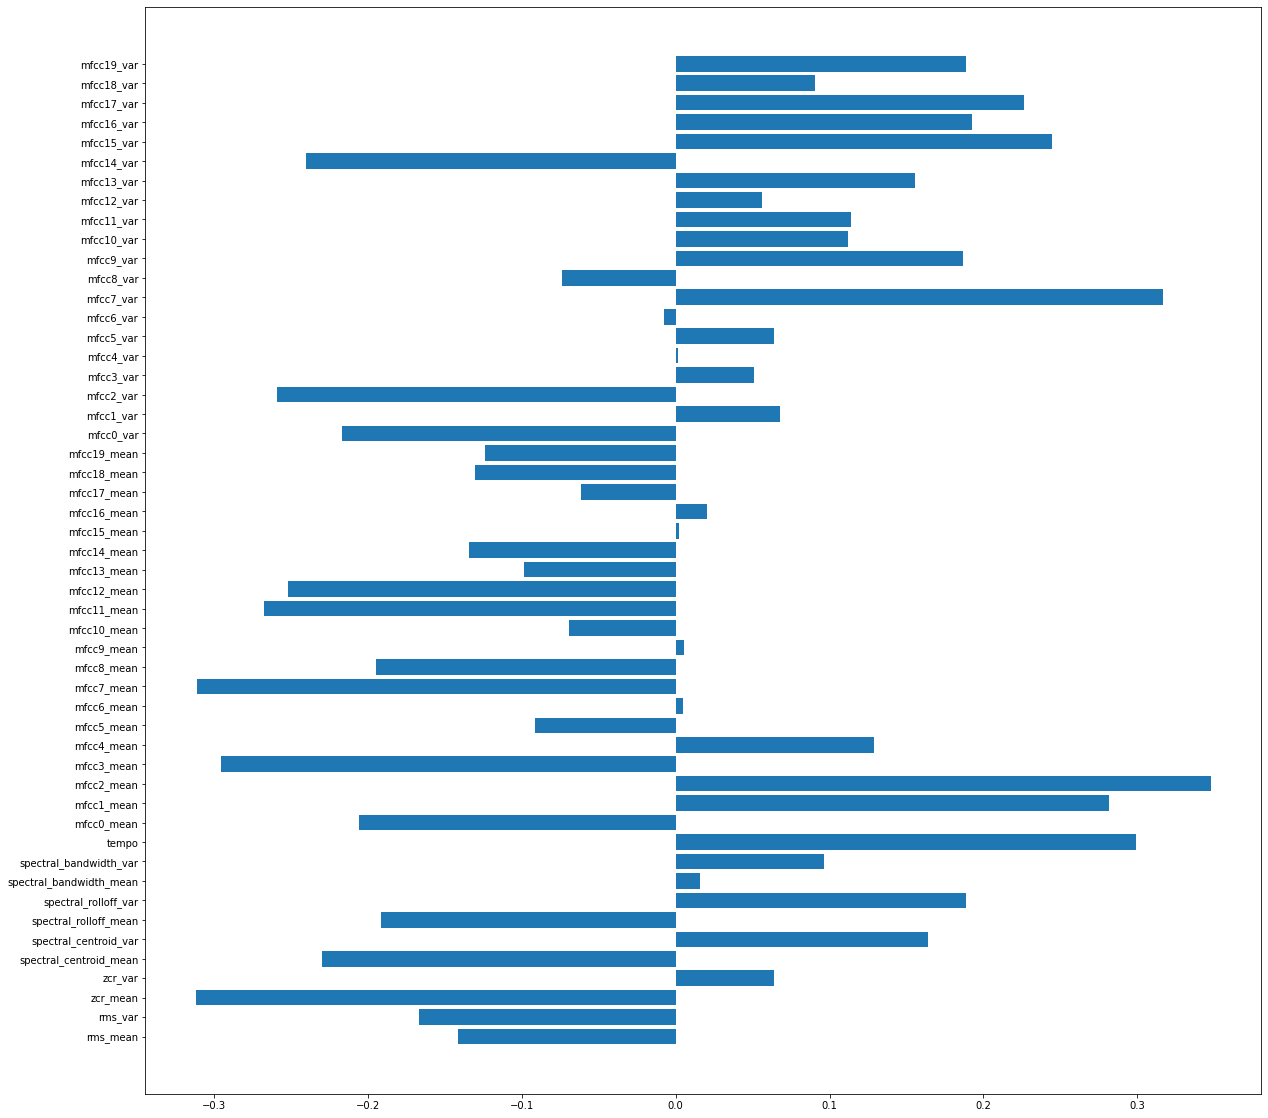

In [103]:
logreg_pipe = Pipeline([("scaler", StandardScaler()), 
                        ("logreg", LogisticRegression(C= 0.1, max_iter =  1000, penalty ='l2',solver= 'liblinear'))])

logreg_pipe.fit(X_train,y_train)
pred_labels_logreg = logreg_pipe.predict(X_test)
class_rep_logreg = classification_report(y_test,pred_labels_logreg, zero_division = 1)
print(f"Logistic Regression (on test data): \n{class_rep_logreg}\n")

feature_coefs =logreg_pipe["logreg"].coef_[0]

coefs = pd.DataFrame(list(zip(df.columns[2:],feature_coefs))
                     ,columns=["feature","coef"])


plt.figure(figsize=(20,20))
plt.barh(coefs["feature"],coefs["coef"])
plt.savefig("Features.png")


coefs["abs_coef"]=coefs.coef.apply(abs)
coefs = coefs.sort_values(by="abs_coef",ascending = False)
print(coefs.head(5))
print()

In [70]:
from sklearn.ensemble import VotingClassifier

classifiers =[("Logistic Regression",logreg_pipe),
              ("K-Neigbors",knn_pipe),
              ("SVC", svc_pipe)]

ensemble = VotingClassifier(estimators=classifiers,voting="soft")


ensemble.fit(X_train,y_train)
pred_labels_ensemble = ensemble.predict(X_test)
class_rep_ensemble = classification_report(y_test,pred_labels_ensemble, zero_division = 1)

print(f"VotingClassifier (on test data): \n{class_rep_ensemble}\n")



ensemble.fit(X_train,y_train)
pred_labels_ensemble = ensemble.predict(X_train)
class_rep_ensemble = classification_report(y_train,pred_labels_ensemble, zero_division = 1)

print(f"VotingClassifier (on train data): \n{class_rep_ensemble}\n")


VotingClassifier (on test data): 
                         precision    recall  f1-score   support

Turkish Classical Music       0.83      0.83      0.83         6
     Turkish Folk Music       0.62      0.83      0.71         6
            Turkish Pop       0.90      0.90      0.90        10
            Turkish Rap       1.00      1.00      1.00         5
           Turkish Rock       0.75      0.60      0.67        10
           Turkish Slow       0.88      0.88      0.88         8

               accuracy                           0.82        45
              macro avg       0.83      0.84      0.83        45
           weighted avg       0.83      0.82      0.82        45


VotingClassifier (on train data): 
                         precision    recall  f1-score   support

Turkish Classical Music       0.98      0.98      0.98        56
     Turkish Folk Music       1.00      0.96      0.98        55
            Turkish Pop       1.00      0.98      0.99        89
            Turk

In [64]:
outfile = open(r"datasets/model_turkish_ensemble",'wb') #write binary
pickle.dump(ensemble,outfile)
outfile.close()